# Importing the necessary packages for data visualization and loading

The opencv library cv2 is used for reading the images one by one and matplotlib library is used for visualizing the image

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Loading and Visualizing the Data

In [2]:
organic1 = cv2.imread('DATASET/TRAIN/O/O_1.jpg')

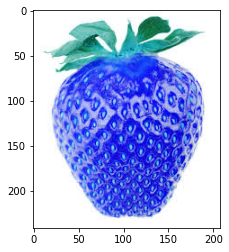

In [3]:
plt.imshow(organic1)

In [4]:
organic1 = cv2.cvtColor(organic1, cv2.COLOR_BGR2RGB)

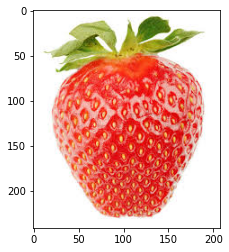

In [5]:
plt.imshow(organic1)

In [6]:
organic1.shape

(242, 208, 3)

In [7]:
organic1.max()

255

In [8]:
recycle10 = cv2.imread('DATASET/TRAIN/R/R_10.jpg')

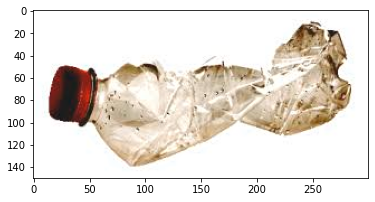

In [9]:
plt.imshow(recycle10)

In [10]:
recycle10 = cv2.cvtColor(recycle10, cv2.COLOR_RGB2BGR)

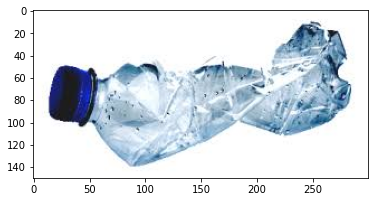

In [11]:
plt.imshow(recycle10)

In [12]:
recycle10.shape

(150, 300, 3)

In [13]:
recycle10.max()

255

<b> Visualizing a random set of 25 training images mixed from both the Organics and Recyclables Class </b>

        - 'O' denotes the Organics class
        - 'R' denotes the Recyclables class

In [14]:
import glob
from PIL import Image
import matplotlib.image as mpimg

In [15]:
organicImages = [{'O': cv2.imread(file)} for file in glob.glob("DATASET/TRAIN/O/*.jpg")]

In [16]:
organicImages = [{'O': cv2.cvtColor(organicImages[i]['O'], cv2.COLOR_BGR2RGB)} for i in range(len(organicImages))]

In [19]:
RecyclablesImages = [{'R': cv2.imread(file)} for file in glob.glob("DATASET/TRAIN/R/*.jpg")]

In [20]:
RecyclablesImages = [{'R': cv2.cvtColor(RecyclablesImages[i]['R'], cv2.COLOR_BGR2RGB)} for i in range(len(RecyclablesImages))]

In [21]:
trainImages = organicImages + RecyclablesImages

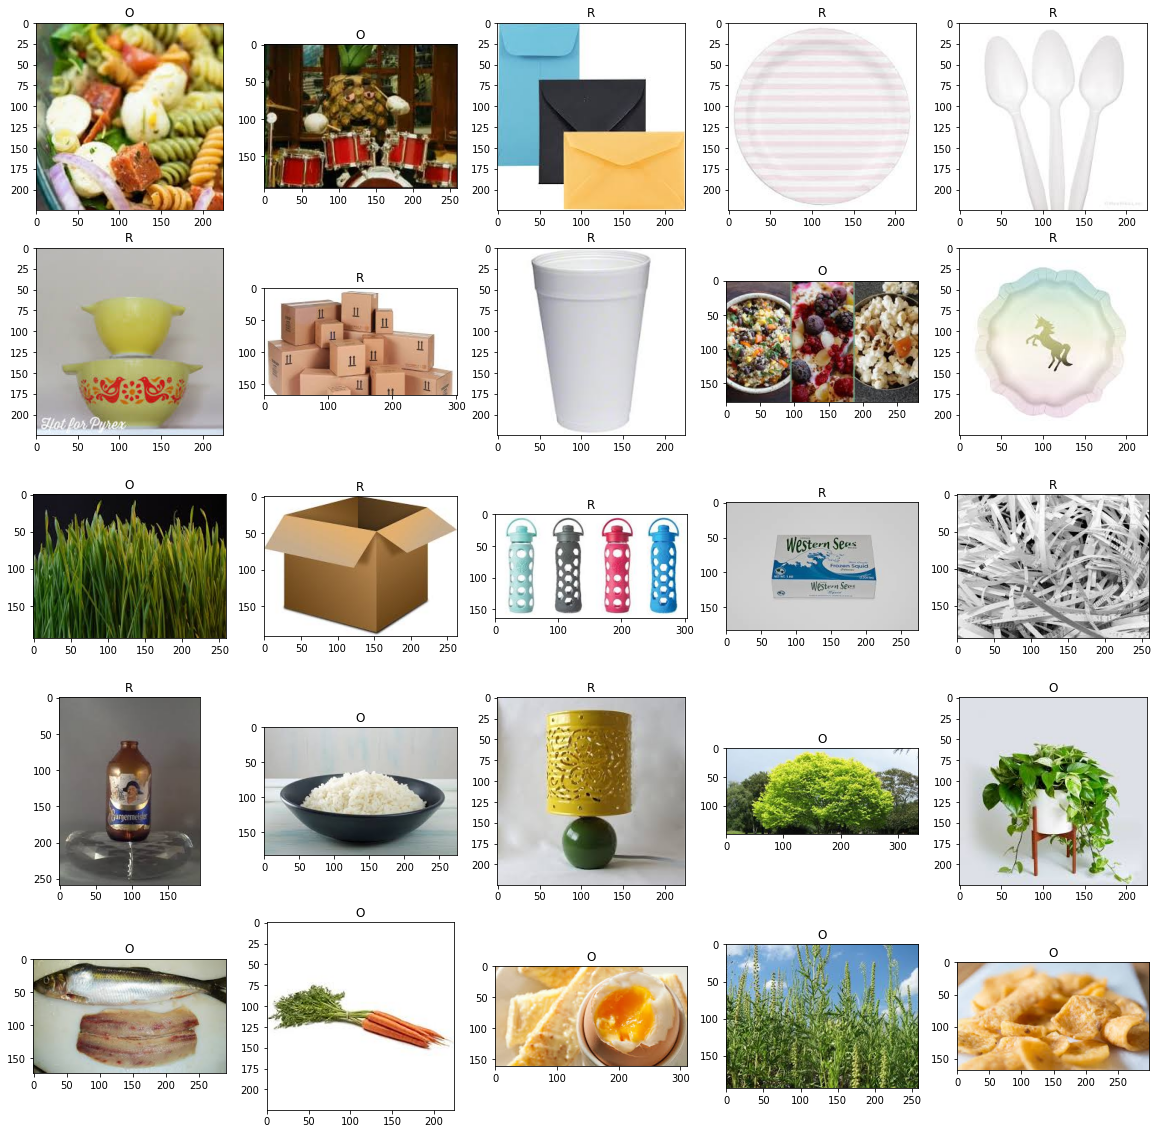

In [22]:
import random
fig = plt.figure(figsize=(20,20))
for i, img in enumerate(random.choices(trainImages, k=25), 1):
    #print(i, img)
    for key, val in img.items():
        #print(key)
        if key == 'R':
            ax = fig.add_subplot(5,5,i)
            #print(val)
            plt.title('R')
            ax.imshow(val)
        elif key == 'O':
            ax = fig.add_subplot(5,5,i)
            #print(l)
            plt.title('O')
            ax.imshow(val)
        #mpplot.show()

# Preparing the data for the model 

Since the dataset is huge, it is impossible to read it all at once in memory. The built-in functions in Keras library are used to automatically process the data and manipulate the images. Manipulating the images with rotation, resizing and scaling are useful to expose the model to different images thereby making it more robust. The *ImageDataGenerator* function in Keras library can perform the above operations automatically

In [48]:
from keras.preprocessing.image import ImageDataGenerator

In [49]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

Using the above variable *image_gen* we can show how this technique applies to a single image. Let us apply this on the *recycle10* image that we've visualized above

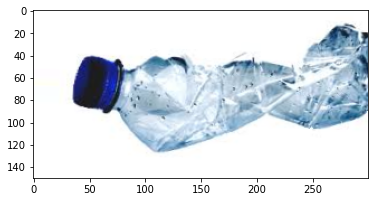

In [50]:
plt.imshow(image_gen.random_transform(recycle10))

It can be seen that the orientation of the image has changed.Consequently, new versions of the image will be generated everytime *random_transform* is applied to the image 

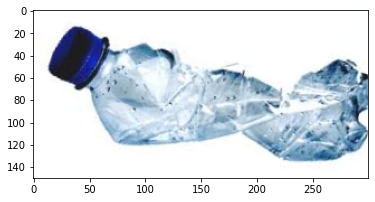

In [51]:
plt.imshow(image_gen.random_transform(recycle10))

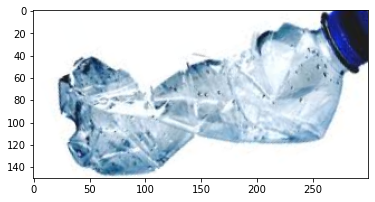

In [52]:
plt.imshow(image_gen.random_transform(recycle10))

<b> Generating many manipulated images from a directory </b>

As we saw how to manipulate a single image, we can now apply it to the input data that we have. We use .flow_from_directory for this process. This module requires that the images be organized in sub-directories. In our case, this is satisfied as the directories contain images of each class Organics and Recyclables in separate folders.

                Image Data Folder
                Organics (O)
                O_1.jpg
                O_2.jpg
                ...
                Recyclables (R)
                R_1.jpg
                R_2.jpg
                


In [53]:
image_gen.flow_from_directory('DATASET/TRAIN')

Found 22564 images belonging to 2 classes.


In [54]:
image_gen.flow_from_directory('DATASET/TEST')

Found 2513 images belonging to 2 classes.


<b> Resizing Images </b>


A closer look at the image data shows that all the images are not of the same size. In order for the CNN to perform well, it is required that all the images are of the same type. Keras can be used to resize all the images to 150 pixels by 150 pixels once they have been manipulated


In [55]:
#Width, Height, Channels
image_shape = (150, 150, 3)

# Creating the Model

In [81]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [67]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3, 3),kernel_initializer='he_normal',activation='relu',input_shape=image_shape,name = 'conv0'))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', name = 'conv1'))
model.add(BatchNormalization(name='bn0'))
model.add(MaxPooling2D(pool_size=(2, 2),name = 'maxpool0'))
model.add(Dropout(0.2,name='dropout0'))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',name = 'conv2'))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu', name = 'conv3'))
model.add(BatchNormalization(name='bn1'))
model.add(MaxPooling2D(pool_size=(2, 2),name = 'maxpool1'))
model.add(Dropout(0.2,name='dropout1'))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',name = 'conv4'))
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',name = 'conv5'))
model.add(BatchNormalization(name='bn2'))
model.add(MaxPooling2D(pool_size=(2, 2),name = 'maxpool2'))
model.add(Dropout(0.3,name='dropout2'))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',name = 'conv6'))
model.add(Conv2D(256, kernel_size=(3, 3),activation='relu',name = 'conv7'))
model.add(BatchNormalization(name='bn3'))
model.add(MaxPooling2D(pool_size=(2, 2),name = 'maxpool3'))
model.add(Dropout(0.3,name='dropout3'))

model.add(Flatten(name='fc'))
model.add(Dense(512, activation='relu',name = 'Dense0'))
model.add(Dense(256, activation='relu',name = 'Dense1'))
model.add(Dense(128, activation='relu',name = 'Dense2'))
model.add(Dropout(0.3,name='dropout4'))
model.add(Dense(2, activation='softmax',name = 'Dense3'))

model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 148, 148, 32)      896       
_________________________________________________________________
conv1 (Conv2D)               (None, 146, 146, 32)      9248      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 146, 146, 32)      128       
_________________________________________________________________
maxpool0 (MaxPooling2D)      (None, 73, 73, 32)        0         
_________________________________________________________________
dropout0 (Dropout)           (None, 73, 73, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 71, 71, 64)        18496     
_________________________________________________________________
conv3 (Conv2D)               (None, 69, 69, 64)       

<b> Training the Model </b>

In [87]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('DATASET/TRAIN',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 22564 images belonging to 2 classes.


In [88]:
batch_size = 16

test_image_gen = image_gen.flow_from_directory('DATASET/TEST',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 2513 images belonging to 2 classes.


In [89]:
train_image_gen.class_indices

{'O': 0, 'R': 1}

'O' denotes Organics and is associated with a binary value of 0
'R' denotes Recyclables and is associated with a binary value of 1

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
results = model.fit_generator(train_image_gen,epochs=80,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/80
150/150 [==============================] - 118s 786ms/step - loss: 0.4708 - accuracy: 0.7967 - val_loss: 0.2868 - val_accuracy: 0.8594
Epoch 2/80
150/150 [==============================] - 117s 780ms/step - loss: 0.4644 - accuracy: 0.8003 - val_loss: 0.4012 - val_accuracy: 0.8021
Epoch 3/80
150/150 [==============================] - 118s 785ms/step - loss: 0.4504 - accuracy: 0.8196 - val_loss: 0.9646 - val_accuracy: 0.5104
Epoch 4/80
150/150 [==============================] - 118s 785ms/step - loss: 0.4547 - accuracy: 0.8025 - val_loss: 0.2796 - val_accuracy: 0.8750
Epoch 5/80
150/150 [==============================] - 118s 784ms/step - loss: 0.4390 - accuracy: 0.8167 - val_loss: 0.4644 - val_accuracy: 0.8646
Epoch 6/80
150/150 [==============================] - 118s 785ms/step - loss: 0.4415 - accuracy: 0.8246 - val_loss: 0.5405 - val_accuracy: 0.7812
Epoch 7/80
150/150 [==============================] - 118s 784ms/step - loss: 0.4303 - accuracy: 0.8200 - val_loss: 0.3756 -

Epoch 57/80
150/150 [==============================] - 117s 783ms/step - loss: 0.3587 - accuracy: 0.8571 - val_loss: 0.1941 - val_accuracy: 0.8802
Epoch 58/80
150/150 [==============================] - 118s 784ms/step - loss: 0.3402 - accuracy: 0.8587 - val_loss: 0.3225 - val_accuracy: 0.8906
Epoch 59/80
150/150 [==============================] - 117s 783ms/step - loss: 0.3594 - accuracy: 0.8567 - val_loss: 0.3105 - val_accuracy: 0.8542
Epoch 60/80
150/150 [==============================] - 117s 783ms/step - loss: 0.3259 - accuracy: 0.8704 - val_loss: 0.4134 - val_accuracy: 0.8333
Epoch 61/80
150/150 [==============================] - 117s 783ms/step - loss: 0.3419 - accuracy: 0.8746 - val_loss: 0.4283 - val_accuracy: 0.8281
Epoch 62/80
150/150 [==============================] - 118s 784ms/step - loss: 0.3323 - accuracy: 0.8633 - val_loss: 0.0853 - val_accuracy: 0.9375
Epoch 63/80
150/150 [==============================] - 118s 785ms/step - loss: 0.3387 - accuracy: 0.8687 - val_loss: 0

In [97]:
model.save('wasteClassificationVGG.h5')

# Evaluating the Model

In [92]:
results.history['accuracy']

[0.7966667,
 0.80025125,
 0.81958336,
 0.8025,
 0.81666666,
 0.82458335,
 0.82,
 0.8225,
 0.8254167,
 0.8329167,
 0.82166666,
 0.82208335,
 0.82458335,
 0.8333333,
 0.82537687,
 0.8283333,
 0.81333333,
 0.8325,
 0.84,
 0.84833336,
 0.8454774,
 0.83875,
 0.8408333,
 0.8491667,
 0.84208333,
 0.84125,
 0.8383333,
 0.85833335,
 0.85041666,
 0.85291666,
 0.8575,
 0.8463149,
 0.85041666,
 0.85375,
 0.8520833,
 0.8525,
 0.8433333,
 0.85541666,
 0.8641667,
 0.85583335,
 0.8505025,
 0.86,
 0.8475,
 0.8570833,
 0.8433333,
 0.85083336,
 0.86333334,
 0.85041666,
 0.85833335,
 0.865,
 0.86791664,
 0.8754167,
 0.85333335,
 0.86041665,
 0.8620833,
 0.85636514,
 0.8570833,
 0.85875,
 0.8566667,
 0.87041664,
 0.8745833,
 0.86333334,
 0.86875,
 0.86791664,
 0.8779167,
 0.87018424,
 0.8666667,
 0.875,
 0.8720833,
 0.86625,
 0.86875,
 0.86833334,
 0.8675,
 0.88149077,
 0.87833333,
 0.87333333,
 0.8720833,
 0.88125,
 0.8731156,
 0.87666667]

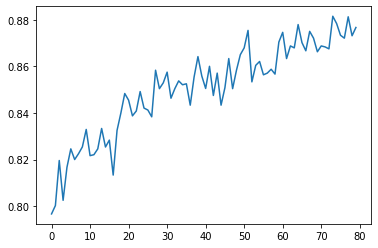

In [93]:
plt.plot(results.history['accuracy'])

# Predicting on new images

In [94]:
import numpy as np
from keras.preprocessing import image

recyclable_file = 'DATASET/TEST/R/R_10148.jpg'

recyclable_img = image.load_img(recyclable_file, target_size=(150, 150))

recyclable_img = image.img_to_array(recyclable_img)

recyclable_img = np.expand_dims(recyclable_img, axis=0)

recyclable_img = recyclable_img/255

In [95]:
prediction_prob = model.predict(recyclable_img)

In [96]:
print(f'Probability that the image is a recyclable is: {prediction_prob}  ')

Probability that the image is a recyclable is: [[0.24640706 0.75359297]]  
